## Random Forest Classifier for Quality dataset. 



In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix

import math
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime


In [2]:
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re
import seaborn as sns

import nltk
from nltk.corpus import stopwords

In [3]:
from sklearn.metrics import confusion_matrix, f1_score

In [4]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from lime.lime_tabular import LimeTabularExplainer

pd.set_option('display.max_columns', None)

In [6]:
# Class to help select categorical vs. continuous data as part of the pipeline (see below)
class DataSelector(BaseEstimator, TransformerMixin):
    '''Select columns of numpy arrays based on attribute_indices.'''

    def __init__(self, attribute_indices):
        self.attribute_indices = attribute_indices

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)[:,self.attribute_indices]

In [7]:
data = pd.read_csv("../News_NYT_MIRROR/newsquality5.csv") #, index_col=0)
#data =data.sample(20000)

In [8]:
data

,Difficulty,ari,Title polarity,Length,Anger,Positivity,Joy,Disgust,Surprise,Trust,Anticipation,Sadness,negative,Fear,Numbers,Polarity,negativity_vader,neutrality_vader,positivity_vader,subjectivity,Tone of speech,rare,mtld,msttr,hdd,Cosine Similarity,Sad,Happy,Inspired,I do not care,Annoyed,Amused,Afraid,avg_word,Sentence length,Mistakes,Adjectives,Diversity,Balance,Afinnity,Strong subjectivity,Weak subjectivity,Valence,Arousal,Dominance,Anger intensity,Joy intensity,Sadness intensity,Fear intensity,Capitals in article,Entertainment,Lexical richness,quality
0,50.09,16.1,0.8750,147,4.081633,7.482993,2.721088,2.040816,0.680272,2.721088,2.721088,2.721088,6.122449,5.442177,2,0.9690,0.212,0.696,0.093,0.238889,13.6054,0.0,13.225650,0.540000,0.407398,0.224268,5.714286,4.761905,2.857143,5.714286,3.809524,3.809524,10.476190,4.836735,4.836735,1.000000,0.123810,1,0.0,-16.0,0.020408,0.095238,0.529704,0.499000,0.586037,0.228933,0.150067,0.171667,0.311733,1,3,302,0
1,52.94,14.2,0.0000,133,0.000000,2.255639,0.000000,0.000000,0.751880,3.759398,0.000000,1.503759,2.255639,0.000000,0,0.8807,0.040,0.855,0.105,0.333333,37.5940,0.0,13.280079,0.535714,0.416280,0.195816,5.102041,8.163265,4.081633,5.102041,1.020408,7.142857,2.040816,4.701493,4.701493,0.996951,0.061224,0,-1.0,5.0,0.022556,0.060150,0.559422,0.422111,0.546267,0.000000,0.255000,0.312667,0.000000,0,0,194,0
2,46.58,21.2,0.5812,536,1.492537,4.104478,0.746269,0.559701,0.373134,2.985075,1.119403,1.492537,3.171642,2.611940,0,0.9981,0.057,0.745,0.199,0.502583,65.2985,0.0,12.892165,0.523419,0.383716,0.400256,7.112971,12.970711,11.715481,5.857741,5.439331,7.949791,6.694561,4.673507,4.673507,1.000000,0.125523,2,0.5,25.0,0.061567,0.074627,0.638760,0.458158,0.567831,0.067918,0.297184,0.088143,0.097633,1,4,602,0
3,64.85,12.8,0.0000,139,2.158273,7.913669,3.597122,1.438849,3.597122,5.755396,3.597122,2.877698,6.474820,2.877698,2,0.7695,0.096,0.758,0.146,0.531169,28.7770,0.0,13.727388,0.544000,0.414694,0.293275,1.886792,6.603774,6.603774,1.886792,2.830189,4.716981,7.547170,4.798561,4.798561,1.000000,0.084906,1,0.0,2.0,0.035971,0.136691,0.572870,0.466426,0.575907,0.066278,0.176500,0.104944,0.092889,3,0,189,0
4,59.87,15.5,0.7603,505,0.198020,6.138614,4.158416,0.396040,3.960396,4.356436,5.742574,0.396040,1.188119,0.990099,6,0.9984,0.014,0.806,0.179,0.449333,41.5842,0.0,13.181171,0.549381,0.412822,0.504153,5.802048,9.897611,7.167235,6.484642,4.095563,8.532423,6.825939,4.842209,4.842209,0.999555,0.126280,2,0.0,54.0,0.045545,0.065347,0.631928,0.453052,0.549876,0.001452,0.459143,0.057024,0.054452,12,2,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68318,6.55,35.4,0.0000,211,2.083333,11.805556,5.555556,2.083333,2.083333,4.166667,4.166667,2.777778,6.250000,2.083333,0,0.9840,0.048,0.764,0.188,0.371795,28.4360,0.0,12.996433,0.533023,0.400252,0.327940,3.472222,11.111111,9.027778,9.027778,2.777778,8.333333,6.250000,4.371560,4.371560,0.999015,0.111111,0,-1.0,12.0,0.066351,0.052133,0.636000,0.435646,0.479709,0.041867,0.362667,0.087200,0.088533,1,3,230,0
68319,-27.66,52.1,0.5574,106,0.000000,5.063291,1.265823,0.000000,2.531646,2.531646,2.531646,1.265823,3.797468,1.265823,0,0.8126,0.029,0.874,0.098,0.176190,47.1698,0.0,12.611356,0.520000,0.391443,0.350839,6.329114,11.392405,12.658228,10.126582,0.000000,7.594937,8.860759,4.358491,4.358491,1.000000,0.037975,0,-1.0,5.0,0.009434,0.056604,0.560485,0.454515,0.498727,0.000000,0.424000,0.129000,0.187500,7,0,161,0
68320,-8.55,36.8,0.4215,141,1.030928,12.371134,2.061856,1.030928,0.000000,8.247423,3.092784,1.030928,1.030928,1.030928,2,0.9887,0.027,0.706,0.267,0.321003,78.0142,0.0,13.083753,0.543226,0.385812,0.355370,5.154639,11.340206,13.402062,6.185567,4.123711,10.309278,4.123711,4.872340,4.872340,1.000000,0.144330,1,0.0,24.0,0.063830,0.056738,0.646551,0.461429,0.565592,0.089875,0.177375,0.185250,0.126000,1,1,

In [9]:
data

,Difficulty,ari,Title polarity,Length,Anger,Positivity,Joy,Disgust,Surprise,Trust,Anticipation,Sadness,negative,Fear,Numbers,Polarity,negativity_vader,neutrality_vader,positivity_vader,subjectivity,Tone of speech,rare,mtld,msttr,hdd,Cosine Similarity,Sad,Happy,Inspired,I do not care,Annoyed,Amused,Afraid,avg_word,Sentence length,Mistakes,Adjectives,Diversity,Balance,Afinnity,Strong subjectivity,Weak subjectivity,Valence,Arousal,Dominance,Anger intensity,Joy intensity,Sadness intensity,Fear intensity,Capitals in article,Entertainment,Lexical richness,quality
0,50.09,16.1,0.8750,147,4.081633,7.482993,2.721088,2.040816,0.680272,2.721088,2.721088,2.721088,6.122449,5.442177,2,0.9690,0.212,0.696,0.093,0.238889,13.6054,0.0,13.225650,0.540000,0.407398,0.224268,5.714286,4.761905,2.857143,5.714286,3.809524,3.809524,10.476190,4.836735,4.836735,1.000000,0.123810,1,0.0,-16.0,0.020408,0.095238,0.529704,0.499000,0.586037,0.228933,0.150067,0.171667,0.311733,1,3,302,0
1,52.94,14.2,0.0000,133,0.000000,2.255639,0.000000,0.000000,0.751880,3.759398,0.000000,1.503759,2.255639,0.000000,0,0.8807,0.040,0.855,0.105,0.333333,37.5940,0.0,13.280079,0.535714,0.416280,0.195816,5.102041,8.163265,4.081633,5.102041,1.020408,7.142857,2.040816,4.701493,4.701493,0.996951,0.061224,0,-1.0,5.0,0.022556,0.060150,0.559422,0.422111,0.546267,0.000000,0.255000,0.312667,0.000000,0,0,194,0
2,46.58,21.2,0.5812,536,1.492537,4.104478,0.746269,0.559701,0.373134,2.985075,1.119403,1.492537,3.171642,2.611940,0,0.9981,0.057,0.745,0.199,0.502583,65.2985,0.0,12.892165,0.523419,0.383716,0.400256,7.112971,12.970711,11.715481,5.857741,5.439331,7.949791,6.694561,4.673507,4.673507,1.000000,0.125523,2,0.5,25.0,0.061567,0.074627,0.638760,0.458158,0.567831,0.067918,0.297184,0.088143,0.097633,1,4,602,0
3,64.85,12.8,0.0000,139,2.158273,7.913669,3.597122,1.438849,3.597122,5.755396,3.597122,2.877698,6.474820,2.877698,2,0.7695,0.096,0.758,0.146,0.531169,28.7770,0.0,13.727388,0.544000,0.414694,0.293275,1.886792,6.603774,6.603774,1.886792,2.830189,4.716981,7.547170,4.798561,4.798561,1.000000,0.084906,1,0.0,2.0,0.035971,0.136691,0.572870,0.466426,0.575907,0.066278,0.176500,0.104944,0.092889,3,0,189,0
4,59.87,15.5,0.7603,505,0.198020,6.138614,4.158416,0.396040,3.960396,4.356436,5.742574,0.396040,1.188119,0.990099,6,0.9984,0.014,0.806,0.179,0.449333,41.5842,0.0,13.181171,0.549381,0.412822,0.504153,5.802048,9.897611,7.167235,6.484642,4.095563,8.532423,6.825939,4.842209,4.842209,0.999555,0.126280,2,0.0,54.0,0.045545,0.065347,0.631928,0.453052,0.549876,0.001452,0.459143,0.057024,0.054452,12,2,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68318,6.55,35.4,0.0000,211,2.083333,11.805556,5.555556,2.083333,2.083333,4.166667,4.166667,2.777778,6.250000,2.083333,0,0.9840,0.048,0.764,0.188,0.371795,28.4360,0.0,12.996433,0.533023,0.400252,0.327940,3.472222,11.111111,9.027778,9.027778,2.777778,8.333333,6.250000,4.371560,4.371560,0.999015,0.111111,0,-1.0,12.0,0.066351,0.052133,0.636000,0.435646,0.479709,0.041867,0.362667,0.087200,0.088533,1,3,230,0
68319,-27.66,52.1,0.5574,106,0.000000,5.063291,1.265823,0.000000,2.531646,2.531646,2.531646,1.265823,3.797468,1.265823,0,0.8126,0.029,0.874,0.098,0.176190,47.1698,0.0,12.611356,0.520000,0.391443,0.350839,6.329114,11.392405,12.658228,10.126582,0.000000,7.594937,8.860759,4.358491,4.358491,1.000000,0.037975,0,-1.0,5.0,0.009434,0.056604,0.560485,0.454515,0.498727,0.000000,0.424000,0.129000,0.187500,7,0,161,0
68320,-8.55,36.8,0.4215,141,1.030928,12.371134,2.061856,1.030928,0.000000,8.247423,3.092784,1.030928,1.030928,1.030928,2,0.9887,0.027,0.706,0.267,0.321003,78.0142,0.0,13.083753,0.543226,0.385812,0.355370,5.154639,11.340206,13.402062,6.185567,4.123711,10.309278,4.123711,4.872340,4.872340,1.000000,0.144330,1,0.0,24.0,0.063830,0.056738,0.646551,0.461429,0.565592,0.089875,0.177375,0.185250,0.126000,1,1,

In [10]:
data.columns

Index(['Difficulty', 'ari', 'Title polarity', 'Length', 'Anger', 'Positivity',
       'Joy', 'Disgust', 'Surprise', 'Trust', 'Anticipation', 'Sadness',
       'negative', 'Fear', 'Numbers', 'Polarity', 'negativity_vader',
       'neutrality_vader', 'positivity_vader', 'subjectivity',
       'Tone of speech', 'rare', 'mtld', 'msttr', 'hdd', 'Cosine Similarity',
       'Sad', 'Happy', 'Inspired', 'I do not care', 'Annoyed', 'Amused',
       'Afraid', 'avg_word', 'Sentence length', 'Mistakes', 'Adjectives',
       'Diversity', 'Balance', 'Afinnity', 'Strong subjectivity',
       'Weak subjectivity', 'Valence', 'Arousal', 'Dominance',
       'Anger intensity', 'Joy intensity', 'Sadness intensity',
       'Fear intensity', 'Capitals in article', 'Entertainment',
       'Lexical richness', 'quality'],
      dtype='object')

In [11]:
data = data.rename(columns={'difficulty': 'Difficulty','title_polarity': 'Title polarity', 
                          'length':'Length', 'anger':'Anger' , 'positivity': 'Positivity',
       'joy':'Joy', 'disgust':'Disgust', 'surprise':'Surprise', 'trust':'Trust', 'anticipation':'Anticipation', 
                                'sadness':'Sadness',
      'fear':'Fear', 'numbers':'Numbers', 'polarity': 'Polarity', 
       'tone_of_speech':'Tone of speech', 'lexical richness': 'Lexical richness',
       'cosine': 'Cosine Similarity', 'sad':'Sad', 'happy': 'Happy', 'inspired': 'Inspired', 
                                'dont_care':'I do not care', 'annoyed':'Annoyed', 'amused':'Amused',
       'afraid':'Afraid', 'sentence length':'Sentence length', 'mistakes':'Mistakes', 'adjectives':'Adjectives',
       'diversity':'Diversity', 'balance':'Balance',  'Strong_subjectivity':'Strong subjectivity',
       'Weak_subjectivity':'Weak subjectivity', 
       'Anger_intensity': 'Anger intensity', 'Joy_intensity':'Joy intensity', 
                                'Sadness_intensity':'Sadness intensity',
       'Fear_intensity':'Fear intensity', 'caps_body':'Capitals in article'})

In [12]:
#data.to_csv("features.csv", index = False)

In [13]:
features= ['Difficulty', 'Title polarity', 'Length', 'Numbers', 'Polarity', 
       'Tone of speech','Lexical richness',
       'Cosine Similarity', 'Sad', 'Happy', 'Inspired', 'I do not care',
       'Annoyed', 'Amused', 'Afraid', 
       'Mistakes', 'Adjectives', 'Diversity', 'Balance', 'Afinnity',
       'Strong subjectivity', 'Valence', 'Arousal',
       'Dominance', 'Anger intensity', 'Joy intensity', 'Sadness intensity',
       'Fear intensity', 
           'Capitals in article', 'Fear intensity', 'Entertainment',
           'quality'
          ]

features= ['Difficulty', #'ari', '
    'Title polarity', 
    'Length', #'anger', 'positivity',
       #'joy', 'disgust', 'surprise', 'trust', 'anticipation', 'sadness',
       #'negative', 'fear', 
    'Numbers', 'Polarity', 'negativity_vader',
       #'neutrality_vader', 'positivity_vader', 'subjectivity',
       'Tone of speech', #'rare', 'mtld', 'msttr', 'hdd', 
    'Lexical richness',
       'Cosine Similarity', #'sad', 'happy', 'inspired', 'dont_care', 'annoyed', 'amused',
       #'afraid', 'avg_word', 'sentence length', 
    'Mistakes', 'Adjectives',
       'Diversity', 'Balance', 'No Celebs', 'Afinnity', 'Strong subjectivity',
       'Weak_subjectivity', 'Valence', 'Arousal', 'Dominance',
       #'Anger_intensity', 'Joy_intensity', 'Sadness_intensity',
       'Fear_intensity', 'Happiness', 'Capitals in article', 'No Sensual', 'No Animals',
       #'No Crime', 
    'quality']

In [14]:
# Load (preprocessed) data
# 
# The raw data was downloaded from https://data.stanford.edu/hcmst and preprocessed.
# We combined data sets collected across several years, we transformed select variables 
# (e.g., partner_education to be at the same level of granularity as education),
# and added variables like the absolute age difference, education difference, etc.
# Finally, we determined whether couples were still together (i.e., our labels).
#
# We provide the preprocessed data as a csv file in the same repo as this notebook.

#df = pd.read_csv('couples.csv')

# Order features (numeric first, categorical second) since it's convenient later
feature_order = ['Difficulty', 'Title polarity', 'Length', 'Numbers', 'Polarity', 
       'Tone of speech','Lexical richness',
       'Cosine Similarity', 'Sad', 'Happy', 'Inspired', 'I do not care',
       'Annoyed', 'Amused', 'Afraid', 
       'Mistakes', 'Adjectives', 'Diversity', 'Balance',
       'Strong subjectivity', 'Valence', 'Arousal',
       'Dominance', 'Anger intensity', 'Joy intensity', 'Sadness intensity',
       'Fear intensity', 
           'Capitals in article', 'Fear intensity', 'Entertainment', 'Afinnity',
           'quality']
data = data[feature_order]
#data = data[data.house != 'boat, rv, van, etc.'] # only one data point with this value, discard

labels = data.pop('quality')

In [15]:
feature_order

['Difficulty',
 'Title polarity',
 'Length',
 'Numbers',
 'Polarity',
 'Tone of speech',
 'Lexical richness',
 'Cosine Similarity',
 'Sad',
 'Happy',
 'Inspired',
 'I do not care',
 'Annoyed',
 'Amused',
 'Afraid',
 'Mistakes',
 'Adjectives',
 'Diversity',
 'Balance',
 'Strong subjectivity',
 'Valence',
 'Arousal',
 'Dominance',
 'Anger intensity',
 'Joy intensity',
 'Sadness intensity',
 'Fear intensity',
 'Capitals in article',
 'Fear intensity',
 'Entertainment',
 'Afinnity',
 'quality']

In [16]:
feature_order[2]

'Length'

In [17]:
data.head()

,Difficulty,Title polarity,Length,Numbers,Polarity,Tone of speech,Lexical richness,Cosine Similarity,Sad,Happy,Inspired,I do not care,Annoyed,Amused,Afraid,Mistakes,Adjectives,Diversity,Balance,Strong subjectivity,Valence,Arousal,Dominance,Anger intensity,Joy intensity,Sadness intensity,Fear intensity,Capitals in article,Fear intensity,Entertainment,Afinnity
0,50.09,0.8750,147,2,0.9690,13.6054,302,0.224268,5.714286,4.761905,2.857143,5.714286,3.809524,3.809524,10.476190,1.000000,0.123810,1,0.0,0.020408,0.529704,0.499000,0.586037,0.228933,0.150067,0.171667,0.311733,1,0.311733,3,-16.0
1,52.94,0.0000,133,0,0.8807,37.5940,194,0.195816,5.102041,8.163265,4.081633,5.102041,1.020408,7.142857,2.040816,0.996951,0.061224,0,-1.0,0.022556,0.559422,0.422111,0.546267,0.000000,0.255000,0.312667,0.000000,0,0.000000,0,5.0
2,46.58,0.5812,536,0,0.9981,65.2985,602,0.400256,7.112971,12.970711,11.715481,5.857741,5.439331,7.949791,6.694561,1.000000,0.125523,2,0.5,0.061567,0.638760,0.458158,0.567831,0.067918,0.297184,0.088143,0.097633,1,0.097633,4,25.0
3,64.85,0.0000,139,2,0.7695,28.7770,189,0.293275,1.886792,6.603774,6.603774,1.886792,2.830189,4.716981,7.547170,1.000000,0.084906,1,0.0,0.035971,0.572870,0.466426,0.575907,0.066278,0.176500,0.104944,0.092889,3,0.092889,0,2.0
4,59.87,0.7603,505,6,0.9984,41.5842,356,0.504153,5.802048,9.897611,7.167235,6.484642,4.095563,8.532423,6.825939,0.999555,0.126280,2,0.0,0.045545,0.631928,0.453052,0.549876,0.001452,0.459143,0.057024,0.054452,12,0.054452,2,54.0


In [18]:
# Model construction starts here

In [19]:
list(data.columns[30:])

['Afinnity']

In [20]:
# Define categorical names and indices
categorical_features = list(data.columns[30:])
categorical_idx = list(range(30, len(data.columns)))
continuous_features = list(data.columns[0:30])
continuous_idx = list(range(0,30))

X = data.values

# Get feature names and their values for categorical data (needed for LIME)
categorical_names = {}
for idx, feature in zip(categorical_idx, categorical_features):
    le = LabelEncoder()
    X[:, idx] = le.fit_transform(X[:, idx])
    categorical_names[idx] = le.classes_

# To suppress a warning later (not strictly necessary)
X = X.astype(float)

# Train test split
train, test, labels_train, labels_test = train_test_split(
    X, labels, train_size=0.70, random_state=42
)

In [21]:
# Preprocessing pipeline
#      
# LIME needs a function that takes raw inputs and returns a prediction (see below).     
# We use sklearn's pipeline to handle preprocessing, it simplifies the interaction with LIME (see below). 
# There are several ways to build this pipeline. For demo purposes, we here show the verbose option (and we
# avoid scaling one-hot encoded features).

continuous_pipeline = Pipeline([
    ('selector', DataSelector(continuous_idx)),
    ('scaler', StandardScaler()),
    ])

categorical_pipeline = Pipeline([
    ('selector', DataSelector(categorical_idx)),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])


preprocessing_pipeline = FeatureUnion(transformer_list=[
    ("continuous_pipeline", continuous_pipeline),
    ("categorical_pipeline", categorical_pipeline),
    ])

# There are less verbose alternatives, especially if we scale one-hot encoded features,
# an accepted practice in the machine learning community:
#
#     preprocessing_pipeline = Pipeline([
#        ('onehotencoder', OneHotEncoder(categorical_features=categorical_idx, sparse=False)),
#        ('scaler', StandardScaler())
#     ])
#
# Finally, instead of the low-level Pipeline constructor, we can use sklearn's makepipeline:
#
#     preprocessing_pipeline = make_pipeline(
#         OneHotEncoder(categorical_features=categorical_idx, sparse=False),
#         StandardScaler()
#     )

In [22]:
# Set up the model and GridSearch for random forest hyperparameter tuning
param_grid = [{'min_samples_leaf' : [15, 20], 'max_features' : ['auto'], 
        'min_samples_split' : [   40, 60]}]

rf = RandomForestClassifier(class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2, n_jobs=8)

# Extend the preprocessing pipeline to include random forest and grid search
pipeline = make_pipeline(preprocessing_pipeline, grid_search)

# Fit the model and tune the hyperparameters
pipeline.fit(train, labels_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('continuous_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataSelector(attribute_indices=[0,
                                                                                                  1,
                                                                                                  2,
                                                                                                  3,
                                                                                                  4,
                                                                                                  5,
                                                                                                  6,
                                                                                                  7,
         

In [23]:
# Hyperparameters found by GridSearchCV
print(pipeline.named_steps['gridsearchcv'].best_params_)

{'max_features': 'auto', 'min_samples_leaf': 15, 'min_samples_split': 40}


In [24]:
# Evalute random forest classifier on training data (it overfits, small sample size)
y_predict = pipeline.predict(train)
f1 = f1_score(labels_train, y_predict)
print('F1 on train:', f1)

# Evalute random forest classifier on test data
y_predict = pipeline.predict(test)
f1 = f1_score(labels_test, y_predict)
print('F1 on test:', f1)

F1 on train: 0.9422079838131772
F1 on test: 0.930269571272257


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [26]:
print(classification_report(labels_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10285
           1       0.95      0.92      0.93     10212

    accuracy                           0.93     20497
   macro avg       0.93      0.93      0.93     20497
weighted avg       0.93      0.93      0.93     20497



In [27]:
# Get feature importances of random forest model ("global interpretability")
best_estimator = pipeline.named_steps['gridsearchcv'].best_estimator_

importances = best_estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
feature_names = data.columns
for f in range(data.shape[1]):
    print("%2d. feature %s (%f)" %
          (f + 1, feature_names[f], importances[indices[f]]))

Feature ranking:
 1. feature Difficulty (0.204840)
 2. feature Title polarity (0.104083)
 3. feature Length (0.095662)
 4. feature Numbers (0.087676)
 5. feature Polarity (0.086478)
 6. feature Tone of speech (0.085903)
 7. feature Lexical richness (0.069422)
 8. feature Cosine Similarity (0.048422)
 9. feature Sad (0.043302)
10. feature Happy (0.024065)
11. feature Inspired (0.018630)
12. feature I do not care (0.015868)
13. feature Annoyed (0.013044)
14. feature Amused (0.010865)
15. feature Afraid (0.010863)
16. feature Mistakes (0.009048)
17. feature Adjectives (0.008224)
18. feature Diversity (0.006739)
19. feature Balance (0.006026)
20. feature Strong subjectivity (0.005926)
21. feature Valence (0.005347)
22. feature Arousal (0.005197)
23. feature Dominance (0.004906)
24. feature Anger intensity (0.004680)
25. feature Joy intensity (0.004655)
26. feature Sadness intensity (0.004157)
27. feature Fear intensity (0.003720)
28. feature Capitals in article (0.003641)
29. feature Fear 

In [28]:
f1_score(labels_test, y_predict, average='macro')

0.9315748469153318

In [29]:
train, test, labels_train, labels_test = train_test_split(
    X, labels, train_size=0.70, random_state=42
)

In [30]:
X_train, X_val, y_train, y_val = train_test_split( X, labels, train_size=0.70, random_state=42)

In [31]:
rf = RandomForestClassifier()
grid = {'min_samples_leaf' : [15, 20], 'max_features' : ['auto'], 
        'min_samples_split' : [   40, 60]
       }
clf = GridSearchCV(rf, grid, cv=5)
clf.fit(train, labels_train)
#best_clf = clf.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto'], 'min_samples_leaf': [15, 20],
                         'min_samples_split': [40, 60]})

In [32]:
clf_val_pred_probs = clf.predict_proba(X_val)

clf_val_pred = clf.predict(X_val)

In [49]:

f1_score(y_val, clf_val_pred, average='macro')

0.953895688101892

In [35]:
# Lets Try a RF classifier selecting manually the parameters

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, y_train)

val_pred_probs = rf.predict_proba(X_val)

val_pred = rf.predict(X_val)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
val_pred_probs = rf.predict_proba(X_val)

val_pred = rf.predict(X_val)

In [36]:
train_pred_probs = rf.predict_proba(X_train)
train_pred = rf.predict(X_train)

In [37]:
log_loss(y_val, val_pred_probs, labels=rf.classes_)

0.16244878452298253

In [38]:
log_loss(y_train, train_pred_probs, labels=rf.classes_)

0.14237253229278699

In [39]:
fi = pd.DataFrame(rf.feature_importances_, data.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Difficulty,0.278686
Capitals in article,0.108079
Lexical richness,0.108018
Adjectives,0.099733
Length,0.084776
Diversity,0.055149
Strong subjectivity,0.051448
Dominance,0.047355
Balance,0.031590
Cosine Similarity,0.027216


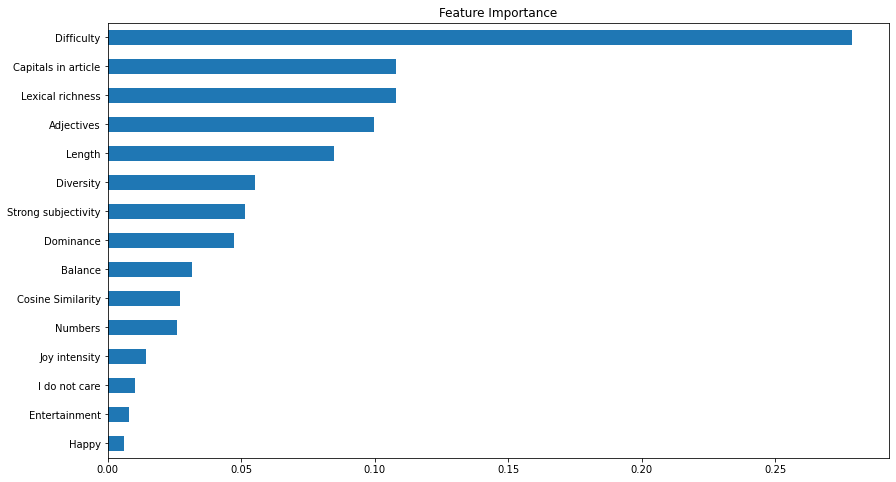

In [40]:
import matplotlib.pyplot as plt

plot = fi.sort_values(by = 'Importance', ascending=True).tail(15).plot.barh(figsize = (14,8), legend = False, title = 'Feature Importance')
fig = plot.get_figure()
#fig.savefig('Importance_News_75.png')

In [41]:
# Use LIME to explain individual predictions, initialize explainer object
explainer = LimeTabularExplainer(
    train,
    class_names=['Low-Quality Article', 'High-Quality Article'],
    feature_names=list(data.columns),
    categorical_features=categorical_idx,
    categorical_names=categorical_names,
    discretize_continuous=True
)

Probability of success: 0.1318865641314159


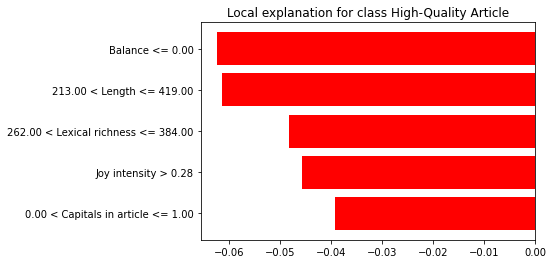

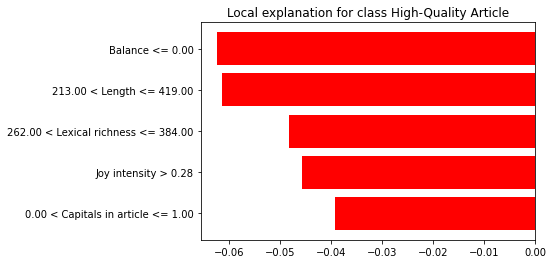

In [42]:
# Explain a prediction ("local interpretability"): 
# Now we see that the pipeline that takes raw data and returns the prediction 
# of the trained model now comes in conveniently.
example = 3
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

Probability of success: 0.9341058278660931


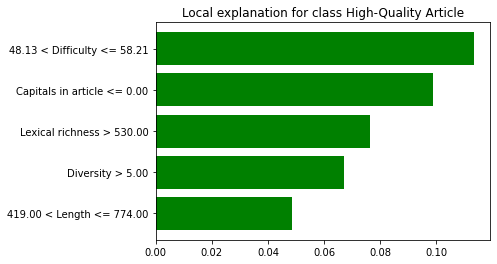

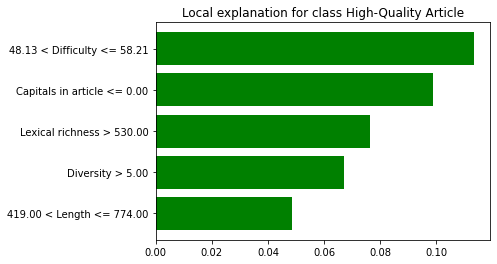

In [43]:
# Explain another prediction ("local interpretability"): 
example = 13
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

Probability of success: 0.713014996711102


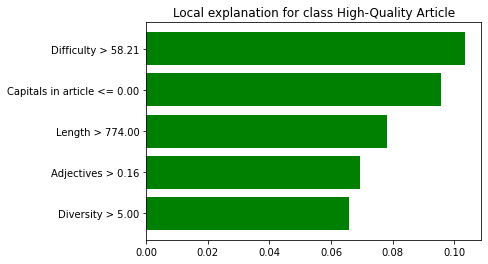

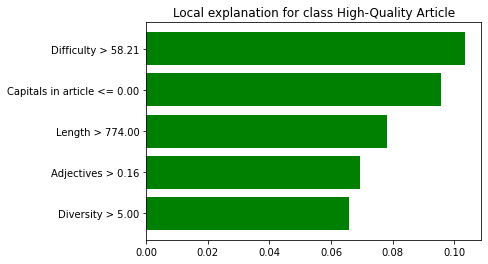

In [44]:
# Explain another prediction ("local interpretability"): 
example = 2
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

Probability of success: 0.12437302469941944


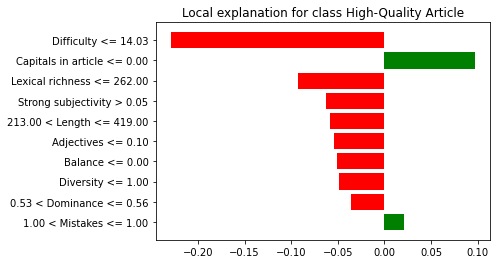

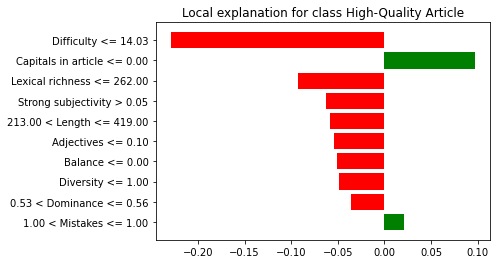

In [45]:
example = 1
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

Probability of success: 0.713014996711102


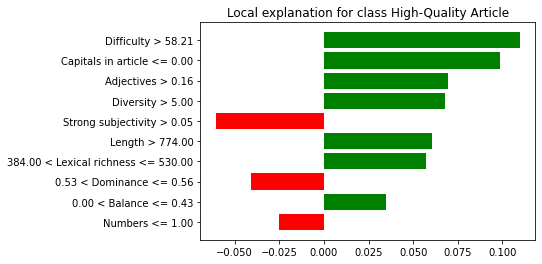

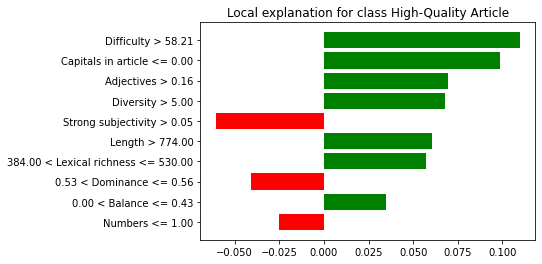

In [46]:
example = 2
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

Probability of success: 0.7597524941651629


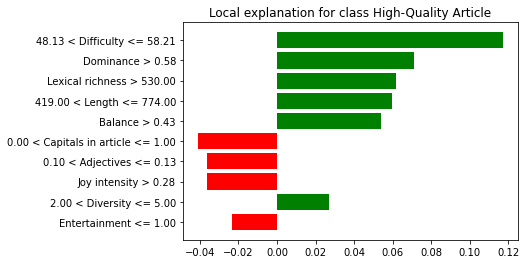

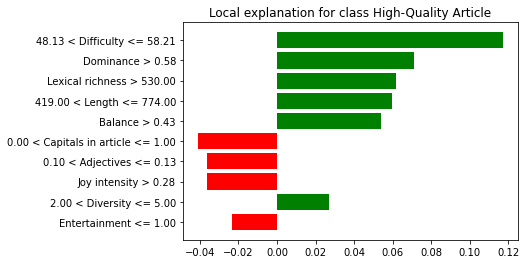

In [47]:
example = 4
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
test[example][5]

In [ ]:
example = 5
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 6
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of high-quality:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 7
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of high-quality:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 8
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of high-quality:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 9
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability high-quality:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 10
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 11
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 12
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 13
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 14
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

example = 15
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 16
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 17
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 18
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 19
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()



In [ ]:
example = 20
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 21
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 22
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 23
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 24
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 25
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 26
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 27
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 28
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 29
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 30
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 31
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=5)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 32
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()
exp.save_to_file('lime.html')

In [ ]:
example = 100
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()

In [ ]:
example = 1000
exp = explainer.explain_instance(test[example], pipeline.predict_proba, num_features=10)
print('Probability of success:', exp.predict_proba[1])
exp.as_pyplot_figure()